In [72]:
import os
import csv
import pandas as pd
import numpy as np
from os import system
import graphviz
import matplotlib
from decimal import Decimal
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [114]:
plt.style.use('seaborn-deep')
matplotlib.rcParams['axes.labelsize'] = 15
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['ytick.labelsize'] = 15

In [48]:
'''
filename = "./data/Chicago_Crimes_2001_2018.csv"
#filename = "./data/data_small.csv"                 # For testing in small data-set
tp5 = pd.read_csv(filename, header=0, iterator=True, chunksize=10000)
input_data = pd.concat(tp5, ignore_index=True)
data_frame = pd.DataFrame(input_data)
cs = cm.Set1(np.arange(40) / 40.)
plt.figure(figsize=(22, 22))
df_area = data_frame['Community Area Name'].value_counts(sort=True)
df_area = pd.DataFrame({'Community Area Name':df_area.index, 'Total Crime Count':df_area.values})

filename_poverty = "./data/Chicago_poverty_and_crime_2004_2013.csv"
filename_temp = "./data/Chicago_Area_crime_poverty_2004_2013_temp.csv"
header = ['Community Area', 'Community Area Name', 'Assault (Homicide)', 'Firearm-related', 'Total Crime',
          'Below Poverty Level', 'Crowded Housing', 'Dependency', 'No High School Diploma', 'Per Capita Income', 'Unemployment']

with open(filename_temp, 'w', newline='', encoding='utf8') as tempfile:    # Open file (empty) to write data
    writer = csv.DictWriter(tempfile, fieldnames=header)
    writer.writeheader()
    with open(filename_poverty, newline='') as csvfile:                          # Open data file to read data
        print("Generating Data...")
        reader = csv.DictReader(csvfile);
        for row in reader:                                                        # Loop through each of the rows in the file
            area_name = row['Community Area Name']                               # Get Community Name
            df_area_temp = df_area[df_area['Community Area Name']== area_name]
            if df_area_temp.empty:
                #print(df_area_temp)
                area_total_crime = 0
            else:
                area_total_crime = df_area_temp['Total Crime Count'].iloc[0]
            #print(area_name + "  " + str(area_total_crime))
            # Write all the data into the temp file.
            writer.writerow({'Community Area': row['Community Area'], 'Community Area Name': row['Community Area Name'], 
                             'Assault (Homicide)': row['Assault (Homicide)'], 'Firearm-related': row['Firearm-related'],
                             'Total Crime': area_total_crime, 'Below Poverty Level': row['Below Poverty Level'],
                             'Crowded Housing': row['Crowded Housing'], 'Dependency': row['Dependency'],
                             'No High School Diploma': row['No High School Diploma'], 'Per Capita Income': row['Per Capita Income'],
                             'Unemployment': row['Unemployment']})
os.remove(filename_poverty)
os.rename(filename_temp, filename_poverty)  # Rename the temp file to origional file. The temp file contained extra data/columns.
print("Done")
csvfile.close()
tempfile.close()
'''         


C:\Anaconda\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Generating Data...
Done


In [131]:

filename_poverty = "./data/Chicago_poverty_and_crime_2004_2013.csv"
filename_temp = "./data/Chicago_Area_crime_poverty_2004_2013_temp.csv"
header = ['Community Area', 'Community Area Name', 'Assault (Homicide)', 'Firearm-related', 'Total Crime',
          'Below Poverty Level', 'Crowded Housing', 'Dependency', 'No High School Diploma', 'Per Capita Income', 
          'Per Capita Income (short)','Unemployment']

with open(filename_temp, 'w', newline='', encoding='utf8') as tempfile:    # Open file (empty) to write data
    writer = csv.DictWriter(tempfile, fieldnames=header)
    writer.writeheader()
    with open(filename_poverty, newline='') as csvfile:                          # Open data file to read data
        print("Generating Data...")
        reader = csv.DictReader(csvfile);
        for row in reader:                                                        # Loop through each of the rows in the file
            area_total_crime = Decimal(row['Assault (Homicide)']) + Decimal(row['Firearm-related'])
            per_capita_short = Decimal(row['Per Capita Income'])* Decimal(.001)
            #print(area_name + "  " + str(area_total_crime))
            # Write all the data into the temp file.
            writer.writerow({'Community Area': row['Community Area'], 'Community Area Name': row['Community Area Name'], 
                             'Assault (Homicide)': row['Assault (Homicide)'], 'Firearm-related': row['Firearm-related'],
                             'Total Crime': area_total_crime, 'Below Poverty Level': row['Below Poverty Level'],
                             'Crowded Housing': row['Crowded Housing'], 'Dependency': row['Dependency'],
                             'No High School Diploma': row['No High School Diploma'], 
                             'Per Capita Income': row['Per Capita Income'], 
                             'Per Capita Income (short)': per_capita_short,
                             'Unemployment': row['Unemployment']})
os.remove(filename_poverty)
os.rename(filename_temp, filename_poverty)  # Rename the temp file to origional file. The temp file contained extra data/columns.
print("Done")
csvfile.close()
tempfile.close()

Generating Data...
Done


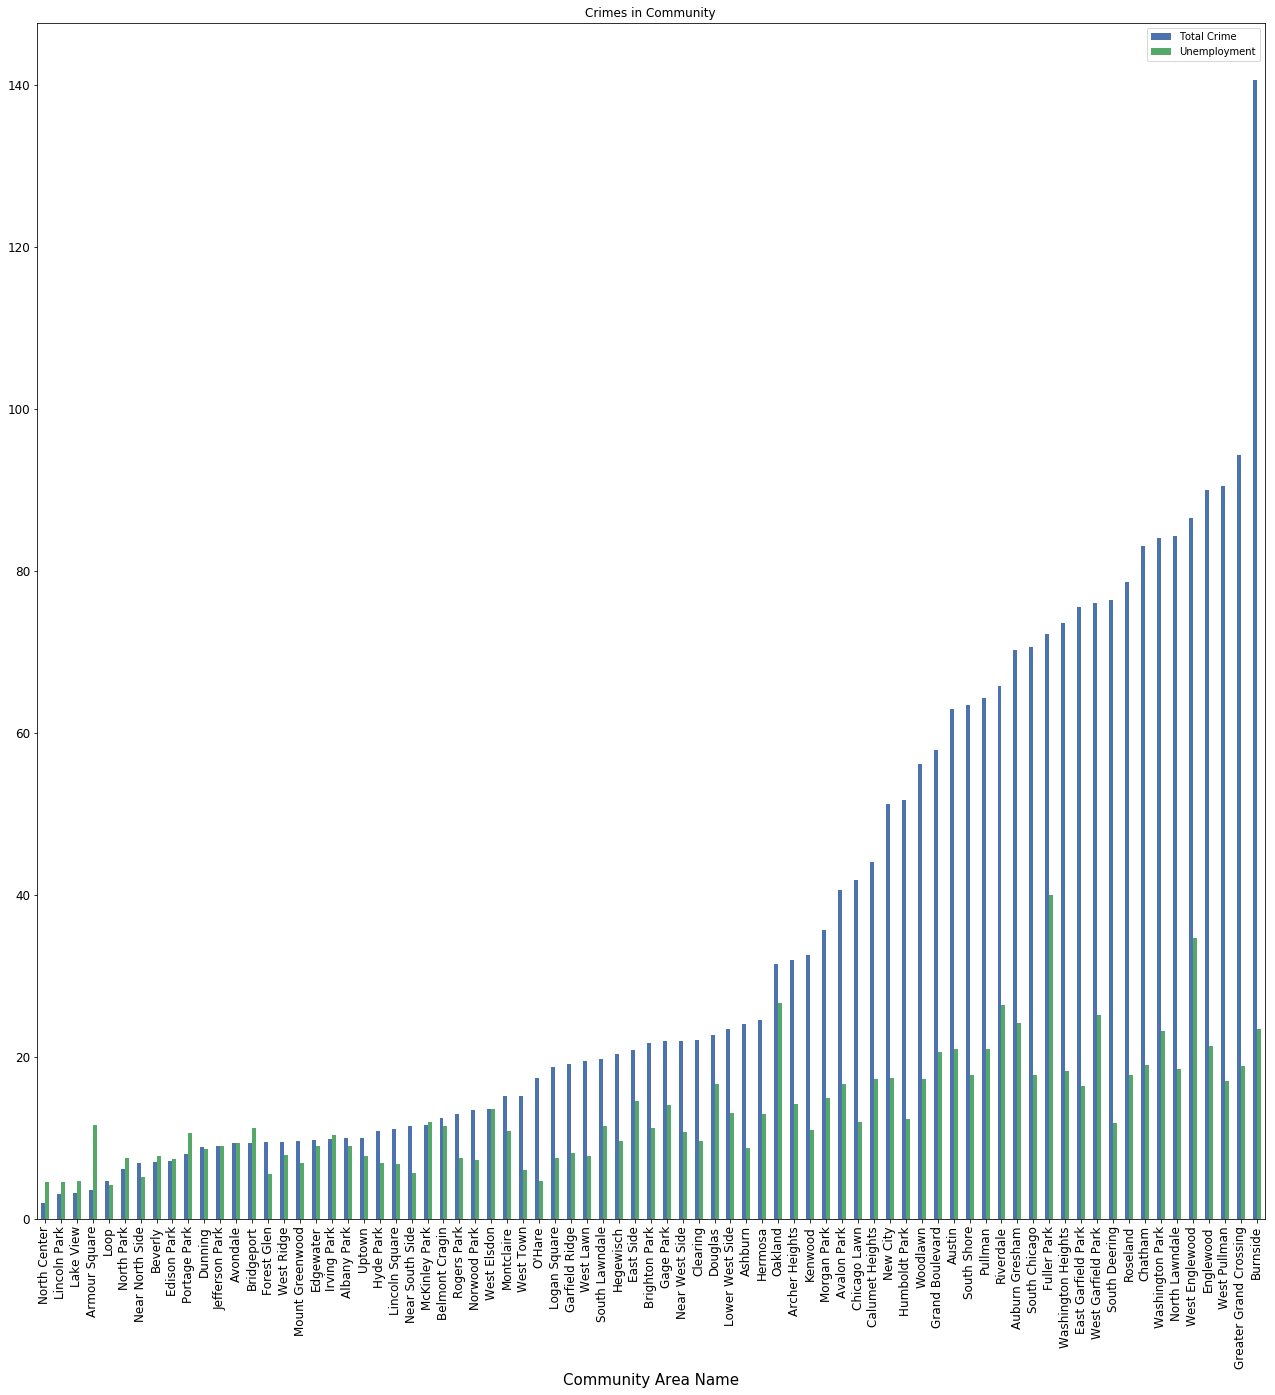

In [119]:


filename_poverty = "./data/Chicago_poverty_and_crime_2004_2013.csv"
data = pd.read_csv(filename_poverty)
data = data.sort_values('Total Crime')  # Sort via Total Crime
#data = data[:30]
#print(data)
data1 = data [['Community Area Name', 'Total Crime', 'Unemployment']]
data1 = data1.set_index('Community Area Name')
'''
data1.plot(figsize=(25, 12))
plt.title('Crime reported in Chicago between year 2001 to 2018')
plt.ylabel("# Crime count");
plt.xlabel("Community Area Name");
plt.legend();
plt.show()
'''
data1.plot.bar(title='Crimes in Community', figsize=(22, 22), fontsize=12)
plt.show()


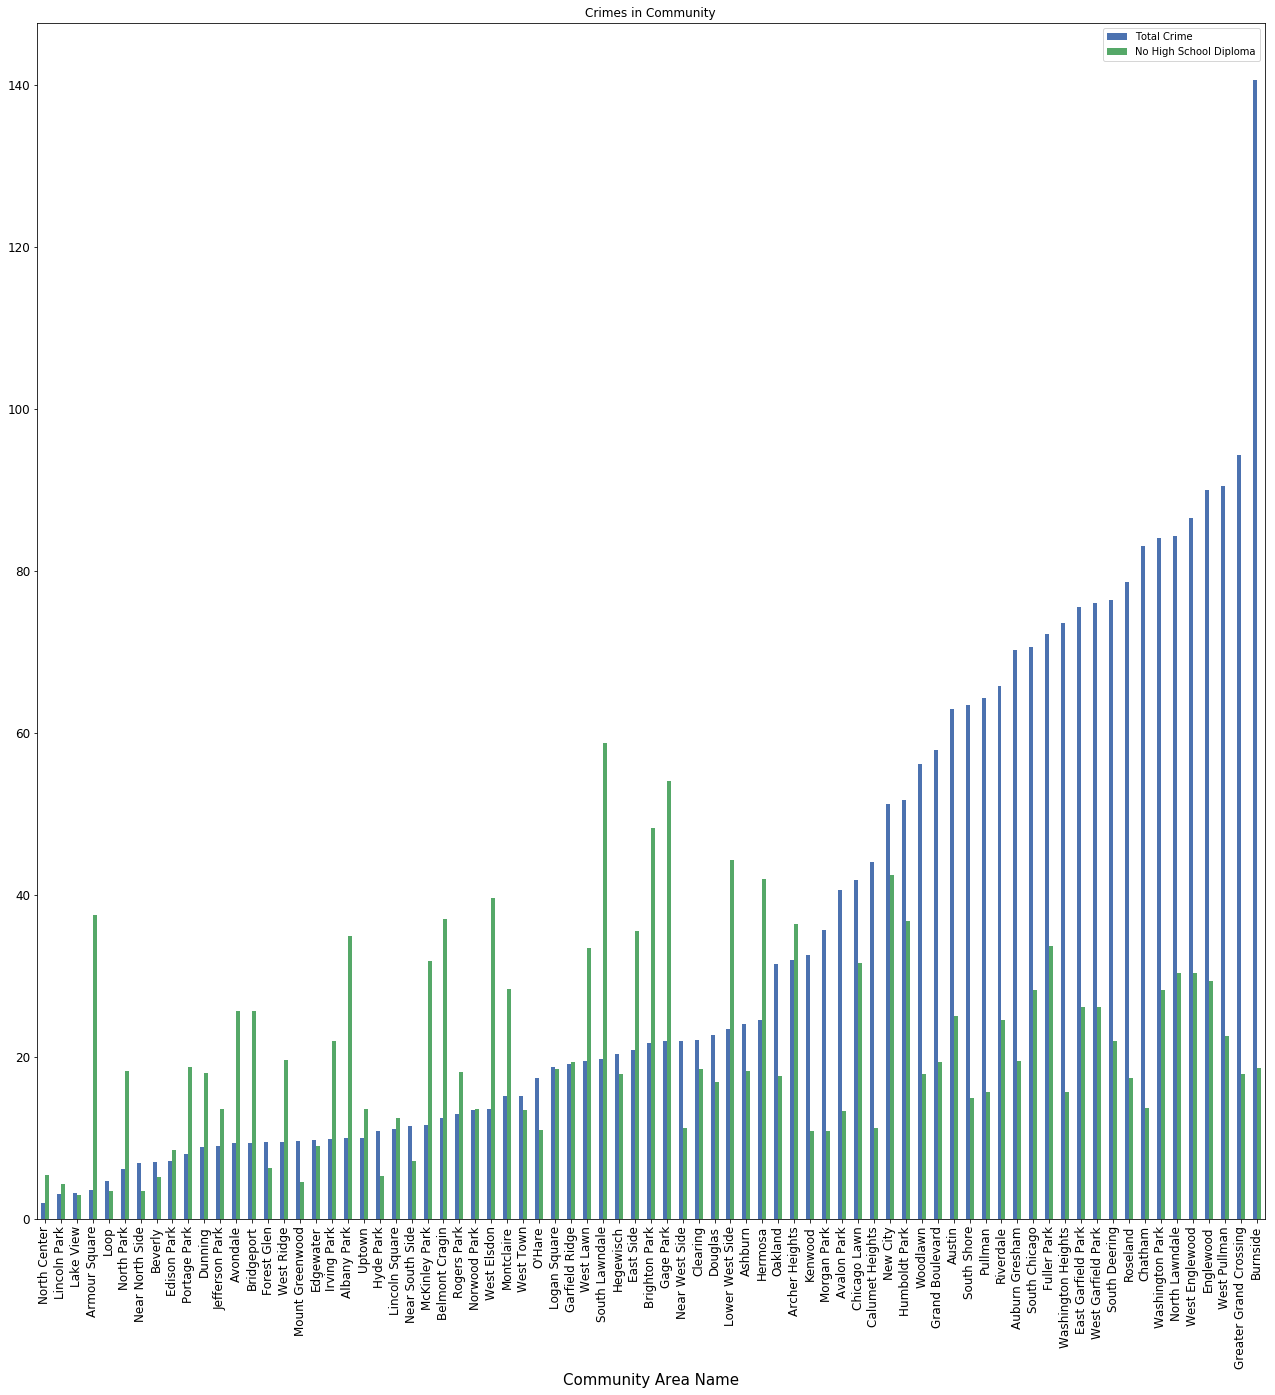

In [121]:
filename_poverty = "./data/Chicago_poverty_and_crime_2004_2013.csv"
data = pd.read_csv(filename_poverty)
data = data.sort_values('Total Crime')  # Sort via Total Crime
#data = data[:12]
#print(data)
data1 = data [['Community Area Name', 'Total Crime', 'No High School Diploma']]
data1 = data1.set_index('Community Area Name')

data1.plot.bar(title='Crimes in Community', figsize=(22, 22), fontsize=12)
plt.show()





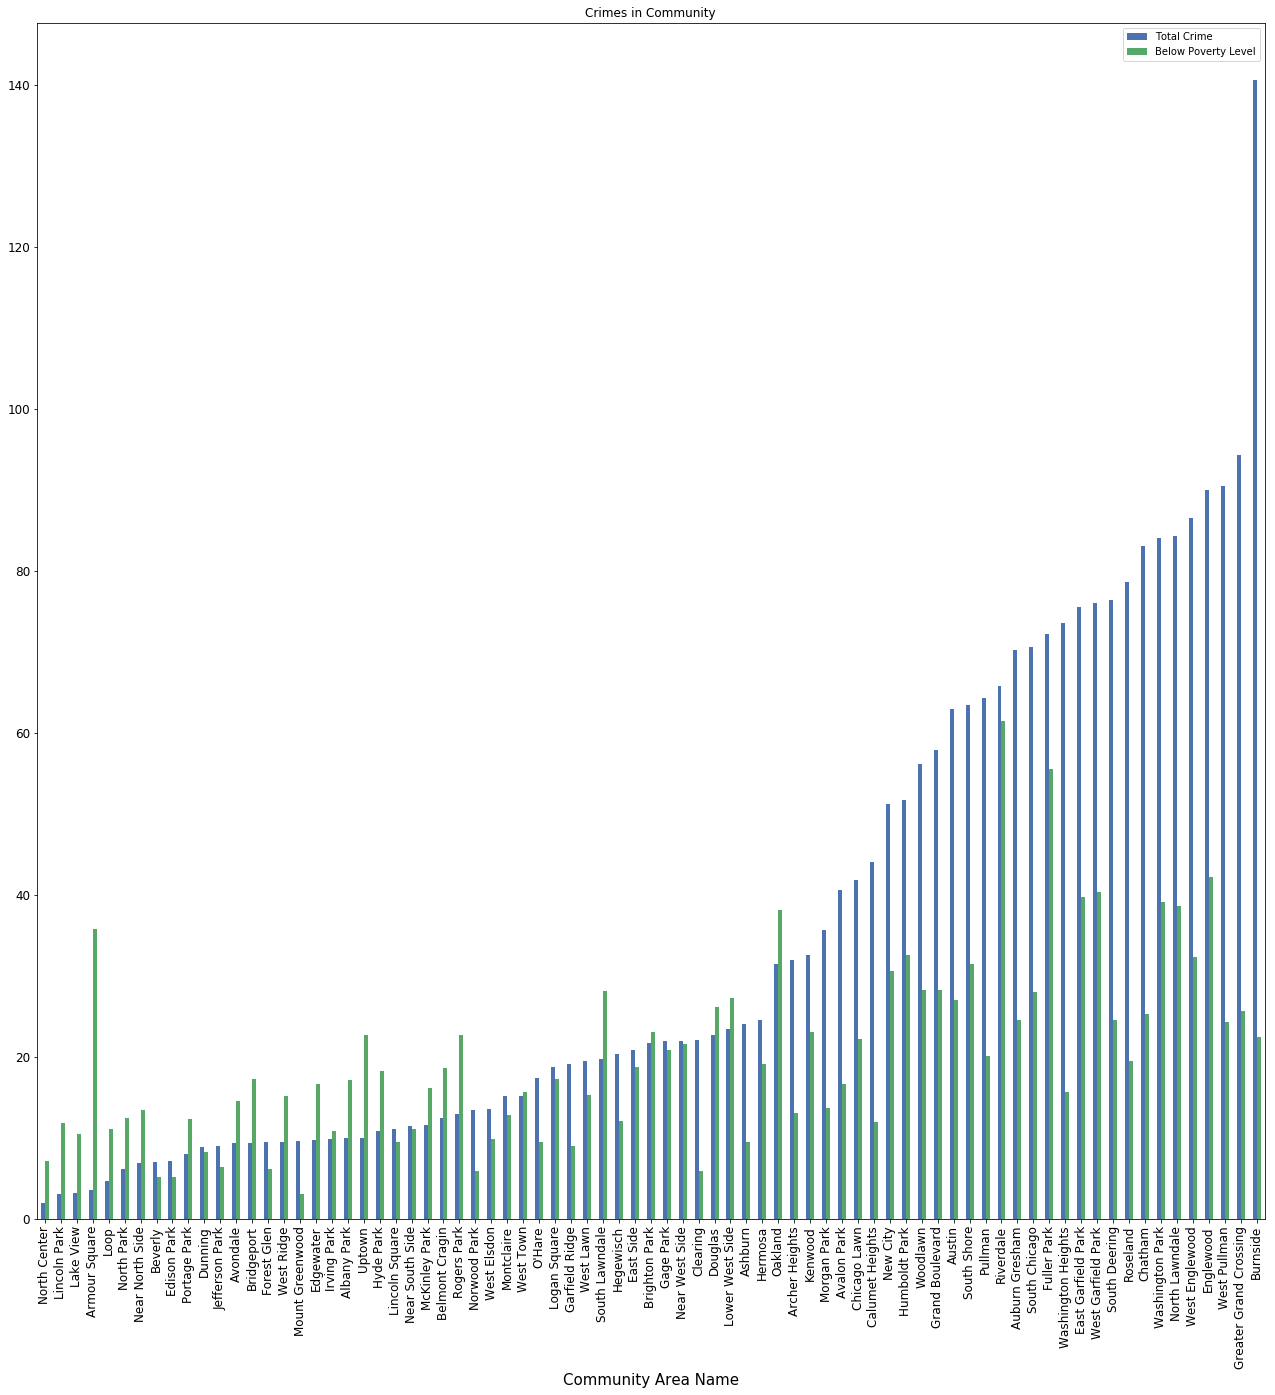

In [122]:
filename_poverty = "./data/Chicago_poverty_and_crime_2004_2013.csv"
data = pd.read_csv(filename_poverty)
data = data.sort_values('Total Crime')  # Sort via Total Crime
#data = data[:12]
#print(data)
data1 = data [['Community Area Name', 'Total Crime', 'Below Poverty Level']]
data1 = data1.set_index('Community Area Name')

data1.plot.bar(title='Crimes in Community', figsize=(22, 22), fontsize=12)
plt.show()

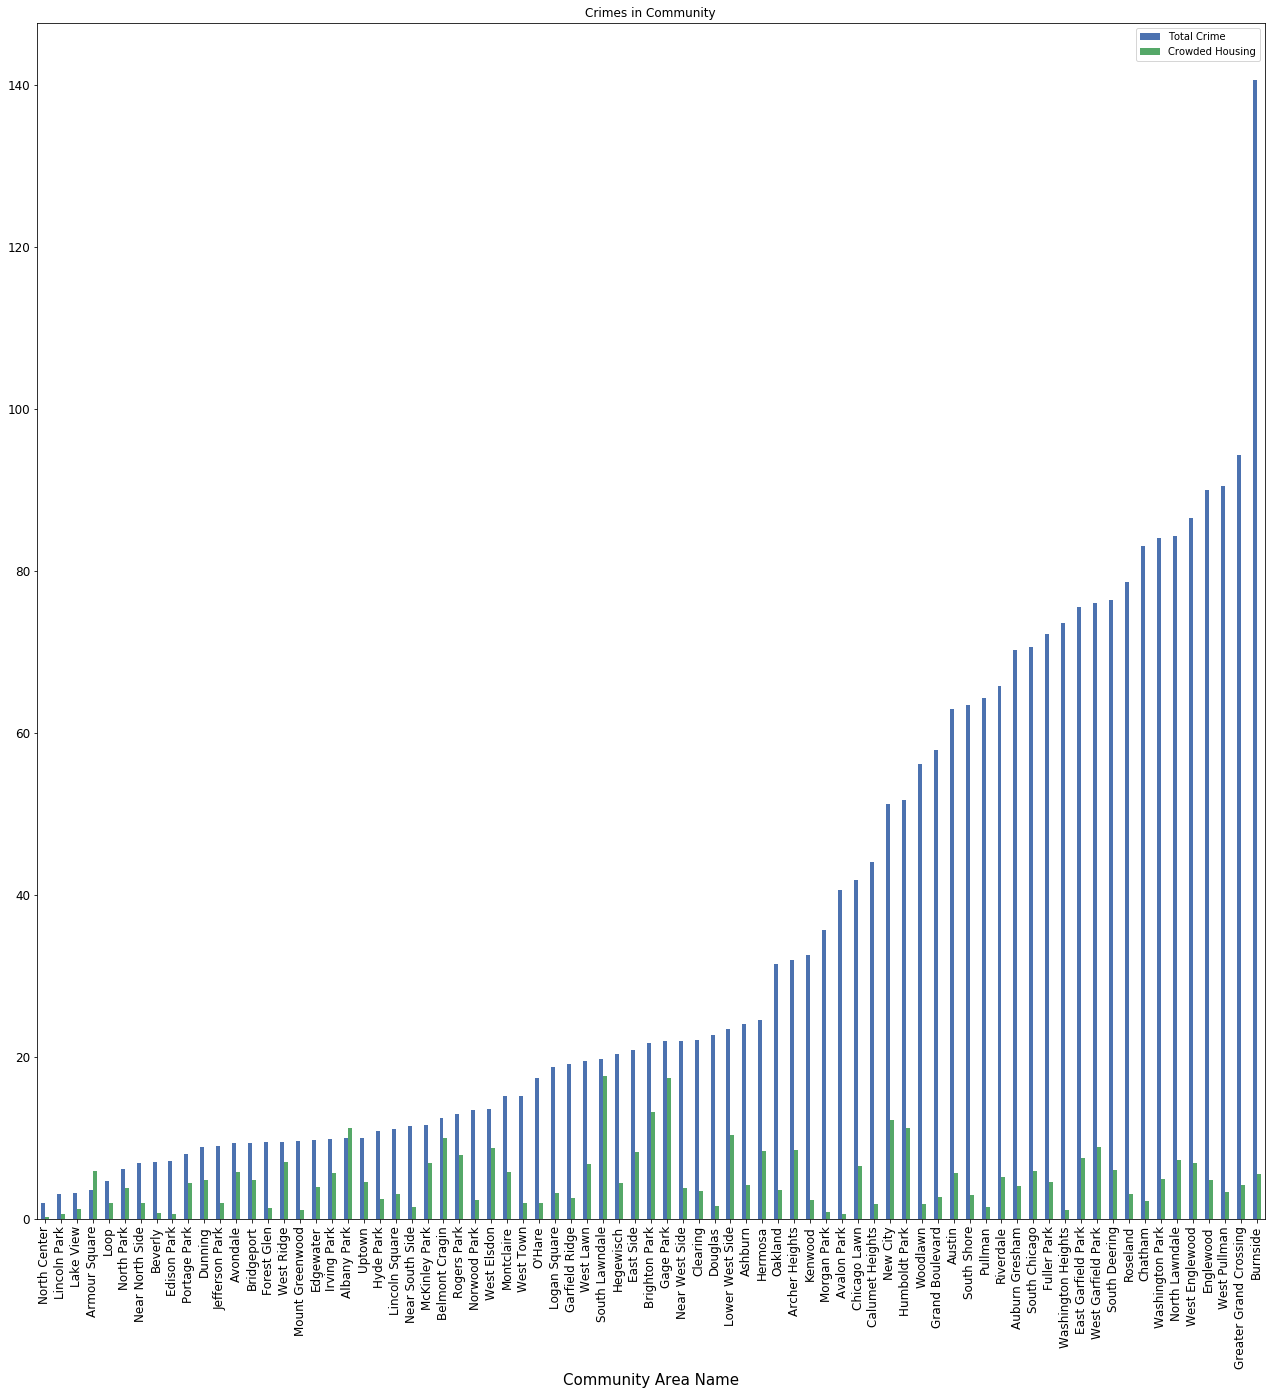

In [123]:
filename_poverty = "./data/Chicago_poverty_and_crime_2004_2013.csv"
data = pd.read_csv(filename_poverty)
data = data.sort_values('Total Crime')  # Sort via Total Crime
#data = data[:12]
#print(data)
data1 = data [['Community Area Name', 'Total Crime', 'Crowded Housing']]
data1 = data1.set_index('Community Area Name')

data1.plot.bar(title='Crimes in Community', figsize=(22, 22), fontsize=12)
plt.show()

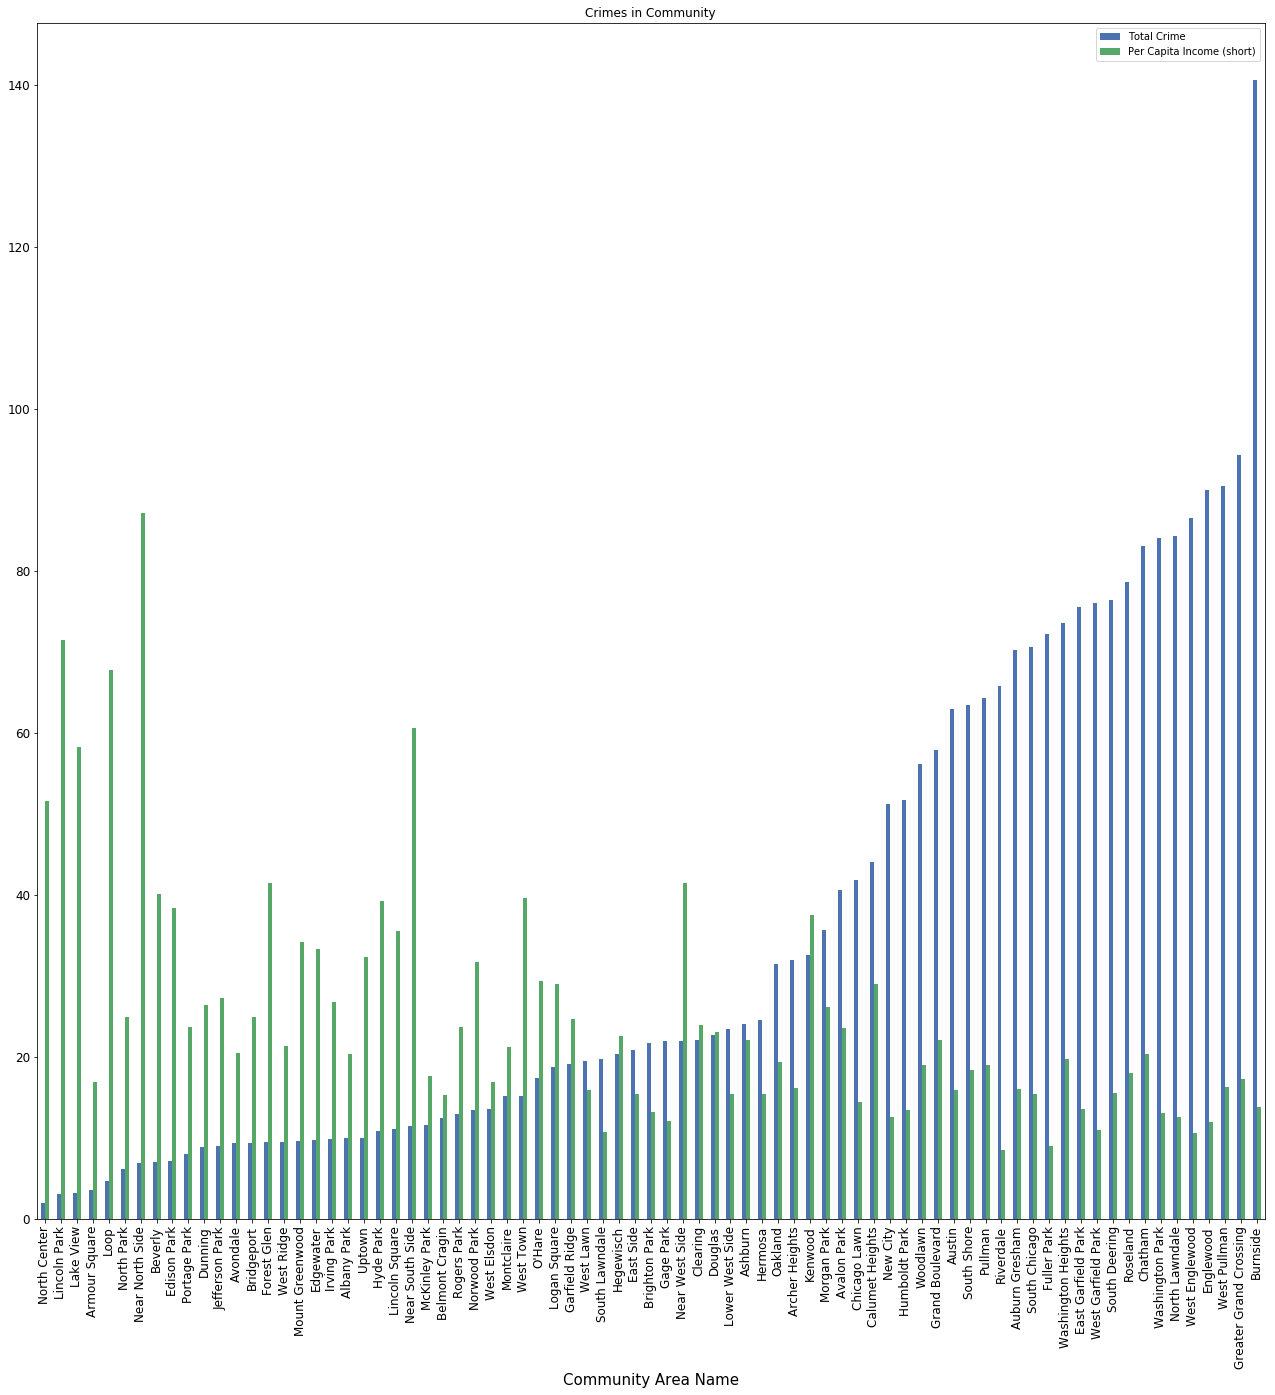

In [132]:
filename_poverty = "./data/Chicago_poverty_and_crime_2004_2013.csv"
data = pd.read_csv(filename_poverty)
data = data.sort_values('Total Crime')  # Sort via Total Crime
#data = data[:12]
#print(data)

data1 = data [['Community Area Name', 'Total Crime', 'Per Capita Income (short)']]

data1 = data1.set_index('Community Area Name')

data1.plot.bar(title='Crimes in Community', figsize=(22, 22), fontsize=12)
plt.show()